In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

plt.style.use("ggplot")

%matplotlib inline

In [51]:
plt.rcParams["figure.figsize"] = (12, 6)


In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/aadityamayankar/Datasets/main/ASIAN-PAINTS.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,8-April-2022,3172.85,3219.00,3150.70,3206.70,3190.305220,63125,8976,201388017.0,34502.0,54.66,68.30,33.85
1,7-April-2022,3145.40,3208.95,3145.40,3155.30,3174.126443,113031,10464,358774686.0,55258.0,48.89,63.55,9.90
2,6-April-2022,3139.60,3165.00,3112.55,3155.05,3144.289330,47496,4958,149341166.0,25788.0,54.30,52.45,15.45
3,5-April-2022,3116.00,3157.25,3080.80,3139.60,3140.860434,48658,3918,152827987.0,29864.0,61.38,76.45,23.60
4,4-April-2022,3147.00,3147.00,3092.60,3117.65,3118.713192,60368,10156,188270478.0,34489.0,57.13,54.40,-29.35


In [53]:
df[df["Date"].duplicated(keep = False)]

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open


In [54]:
df = df[~df["Date"].duplicated()]

In [55]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,,
2022-04-08,8-April-2022,3172.85,3219.00,3150.70,3206.70,3190.305220,63125,8976,201388017.0,34502.0,54.66,68.30,33.85
2022-04-07,7-April-2022,3145.40,3208.95,3145.40,3155.30,3174.126443,113031,10464,358774686.0,55258.0,48.89,63.55,9.90
2022-04-06,6-April-2022,3139.60,3165.00,3112.55,3155.05,3144.289330,47496,4958,149341166.0,25788.0,54.30,52.45,15.45
2022-04-05,5-April-2022,3116.00,3157.25,3080.80,3139.60,3140.860434,48658,3918,152827987.0,29864.0,61.38,76.45,23.60
2022-04-04,4-April-2022,3147.00,3147.00,3092.60,3117.65,3118.713192,60368,10156,188270478.0,34489.0,57.13,54.40,-29.35


In [56]:
df.index

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2014-04-28', '2014-04-25', '2014-04-23', '2014-04-22',
               '2014-04-21', '2014-04-17', '2014-04-16', '2014-04-15',
               '2014-04-11', '2014-04-10'],
              dtype='datetime64[ns]', name='Date', length=1976, freq=None)

<AxesSubplot:xlabel='Date'>

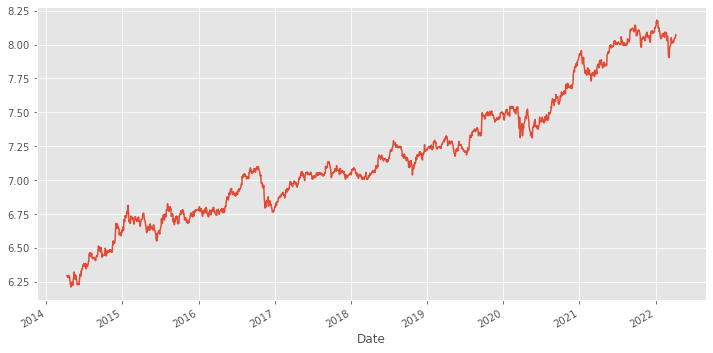

In [57]:
y = np.log(df["Close Price"])
y.plot()

In [58]:
y.index

DatetimeIndex(['2022-04-08', '2022-04-07', '2022-04-06', '2022-04-05',
               '2022-04-04', '2022-04-01', '2022-03-31', '2022-03-30',
               '2022-03-29', '2022-03-28',
               ...
               '2014-04-28', '2014-04-25', '2014-04-23', '2014-04-22',
               '2014-04-21', '2014-04-17', '2014-04-16', '2014-04-15',
               '2014-04-11', '2014-04-10'],
              dtype='datetime64[ns]', name='Date', length=1976, freq=None)

In [59]:
list(y.index[:10])

[Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-03-28 00:00:00')]

In [60]:
y.asfreq("D")[:15]

Date
2014-04-10    6.293974
2014-04-11    6.295174
2014-04-12         NaN
2014-04-13         NaN
2014-04-14         NaN
2014-04-15    6.281893
2014-04-16    6.281425
2014-04-17    6.298214
2014-04-18         NaN
2014-04-19         NaN
2014-04-20         NaN
2014-04-21    6.290921
2014-04-22    6.284787
2014-04-23    6.272122
2014-04-24         NaN
Freq: D, Name: Close Price, dtype: float64

In [61]:
y.asfreq("D", method="ffill")[:15]

Date
2014-04-10    6.293974
2014-04-11    6.295174
2014-04-12    6.281893
2014-04-13    6.281893
2014-04-14    6.281893
2014-04-15    6.281893
2014-04-16    6.281425
2014-04-17    6.298214
2014-04-18    6.290921
2014-04-19    6.290921
2014-04-20    6.290921
2014-04-21    6.290921
2014-04-22    6.284787
2014-04-23    6.272122
2014-04-24    6.244167
Freq: D, Name: Close Price, dtype: float64

In [62]:
y = y.asfreq("B")
y.index

DatetimeIndex(['2014-04-10', '2014-04-11', '2014-04-14', '2014-04-15',
               '2014-04-16', '2014-04-17', '2014-04-18', '2014-04-21',
               '2014-04-22', '2014-04-23',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', name='Date', length=2087, freq='B')

In [63]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2014-06-30,6.211202,6.384688,6.293974,6.384688,6.282687,6.280763
2014-09-30,6.343880,6.513675,6.369216,6.444767,6.431251,6.429915
2014-12-31,6.441106,6.680541,6.448256,6.622404,6.536981,6.547650
2015-03-31,6.620540,6.813774,6.620540,6.695490,6.702390,6.709082
2015-06-30,6.550437,6.756467,6.710523,6.625989,6.638241,6.647562
2015-09-30,6.633318,6.825949,6.633318,6.734711,6.732062,6.731971
2015-12-31,6.682422,6.784287,6.732032,6.784287,6.752212,6.743193
2016-03-31,6.728569,6.803339,6.780092,6.766998,6.770273,6.767910
2016-06-30,6.747880,6.939205,6.768436,6.911399,6.862967,6.844003


In [64]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2014-04-10,6.293974,NaN,6.293974
2014-04-11,6.295174,NaN,6.294774
2014-04-14,NaN,NaN,6.294774
2014-04-15,6.281893,NaN,6.285406
2014-04-16,6.281425,NaN,6.283047
2014-04-17,6.298214,6.287177,6.291273
2014-04-18,NaN,NaN,6.291273
2014-04-21,6.290921,NaN,6.291032
2014-04-22,6.284787,NaN,6.287423


In [65]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.01187751571477654
rmse over ewma:  0.009043367455122759


<AxesSubplot:xlabel='Date'>

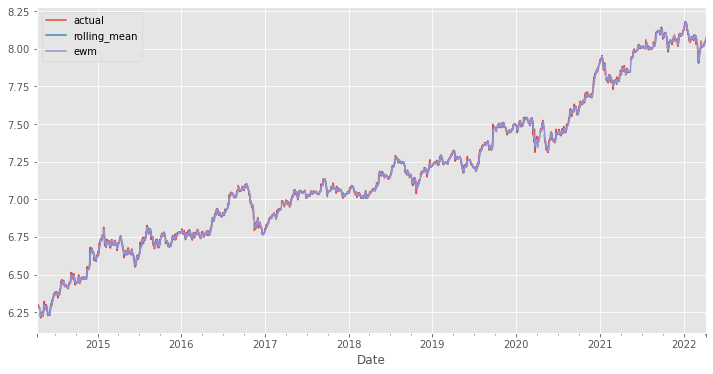

In [66]:
y_rolling.plot()

In [67]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.735186
p-value: 0.837424


In [68]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2014-04-10,6.293974,NaN,NaN
2014-04-11,6.295174,NaN,NaN
2014-04-14,NaN,NaN,NaN
2014-04-15,6.281893,-0.012081,NaN
2014-04-16,6.281425,-0.013748,-0.001668
2014-04-17,6.298214,NaN,NaN
2014-04-18,NaN,NaN,NaN
2014-04-21,6.290921,0.009496,NaN
2014-04-22,6.284787,-0.013427,-0.022922


In [69]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -45.615720
p-value: 0.000000


<AxesSubplot:xlabel='Date'>

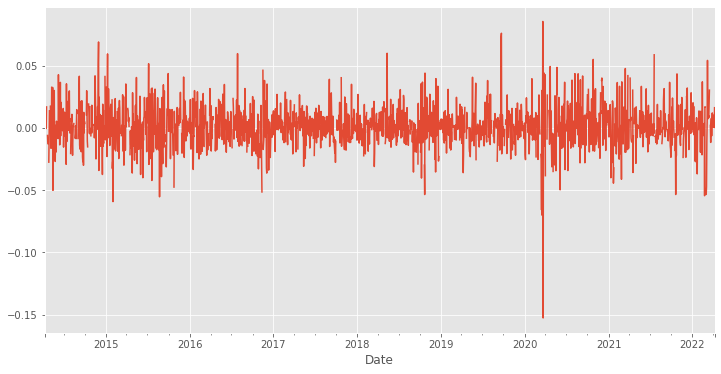

In [70]:
y.diff(periods=1).plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

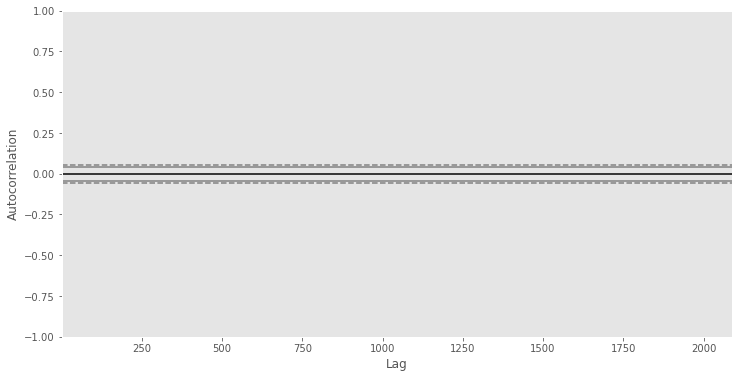

In [71]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

In [72]:
y = y.dropna()

C:\Users\ADI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ADI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency inf

                  0
count  1.970000e+03
mean   2.279458e-07
std    1.662063e-02
min   -1.476903e-01
25%   -8.881076e-03
50%   -5.233374e-04
75%    8.461348e-03
max    8.284057e-02


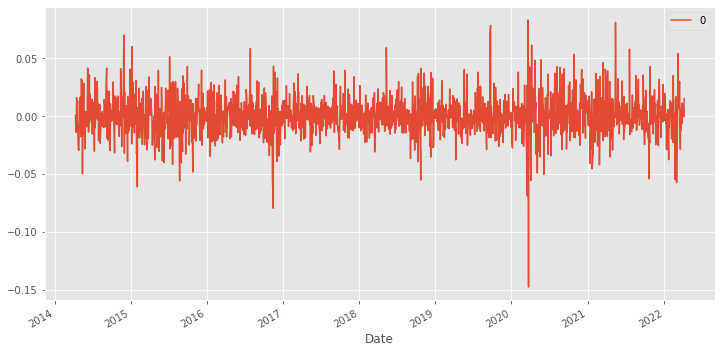

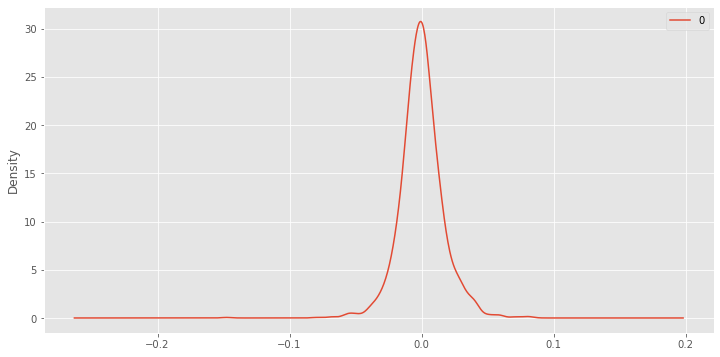

In [73]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(y, order=(5,1,0)) # p, d, q
model_fit = model.fit(disp=0)
#print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [74]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Close Price   No. Observations:                 1970
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5276.498
Method:                       css-mle   S.D. of innovations              0.017
Date:                Thu, 28 Apr 2022   AIC                         -10538.995
Time:                        17:38:21   BIC                         -10499.895
Sample:                             1   HQIC                        -10524.627
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0009      0.000      2.481      0.013       0.000       0.002
ar.L1.D.Close Price    -0.0440      0.023     -1.955      0.051      -0.088       0.000
ar.L2.D.Close Price     0.0048      0.023      0.211      0.833      -0.039       0.049
ar.L3.D.Close Price     0.0231      0.023      1.023      0.306      -0.021       0.067
ar.L4.D.Close Price    -0.0133      0.023     -0.590      0.555      -0.057       0.031
ar.L5.D.Close Price     0.0005      0.023      0.021      0.983      -0.044       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7564           -1.8922j            2.5817           -0.3691
AR.2           -1.7564           +1.8922j            2.5817            0.3691
AR.3            2.6881           -2.2058j            3.4773           -0.1094
AR.4            2.6881           +2.2058j            3.4773            0.1094
AR.5           26.0699           -0.0000j           26.0699           -0.0000
-----------------------------------------------------------------------------
"""

C:\Users\ADI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


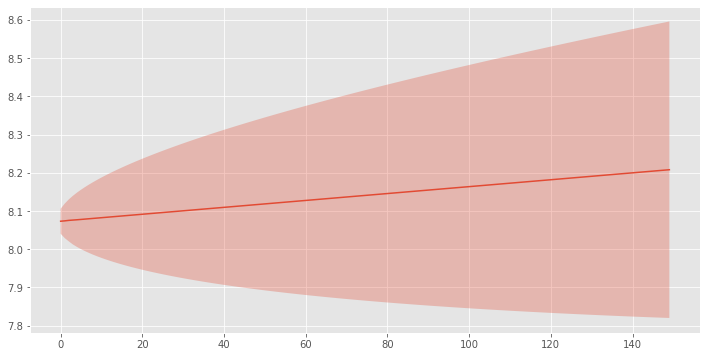

In [75]:
model = ARIMA(y.values, order=(5,1,0))
model_fit = model.fit(disp=0)
predictions, error, conf_interval = model_fit.forecast(150)
plt.plot(predictions)
plt.fill_between(range(len(predictions)), conf_interval[:,0], conf_interval[:,1], alpha = 0.3)

In [76]:
predictions[:10]

array([8.07323569, 8.07417085, 8.07543349, 8.07610184, 8.0770333 ,
       8.07794106, 8.07883339, 8.07974041, 8.08064238, 8.08154473])

In [77]:
error[:10]

array([0.0166164 , 0.02298751, 0.02800529, 0.03243912, 0.03622227,
       0.03965954, 0.04282336, 0.04576518, 0.04853059, 0.05114647])

In [78]:
conf_interval[:10]

array([[8.04066814, 8.10580325],
       [8.02911616, 8.11922554],
       [8.02054414, 8.13032284],
       [8.01252233, 8.13968134],
       [8.00603896, 8.14802765],
       [8.00020978, 8.15567234],
       [7.99490115, 8.16276563],
       [7.99004231, 8.16943851],
       [7.98552417, 8.17576059],
       [7.98129949, 8.18178997]])

In [79]:
model.endog

array([ 1.20009246e-03, -1.32809010e-02, -4.67573768e-04, ...,
        4.90894046e-03,  7.92349078e-05,  1.61587923e-02])

In [80]:
(predictions + 1.96 * error)[:10]

array([8.10580384, 8.11922637, 8.13032385, 8.13968251, 8.14802896,
       8.15567377, 8.16276717, 8.16944016, 8.17576234, 8.18179181])

In [81]:
(predictions - 1.96 * error)[:10]

array([8.04066754, 8.02911533, 8.02054313, 8.01252116, 8.00603765,
       8.00020835, 7.99489961, 7.99004067, 7.98552243, 7.98129765])

C:\Users\ADI\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=7.450665, actual=7.427977
predicted=7.429126, actual=7.443400
predicted=7.444187, actual=7.444599
predicted=7.445288, actual=7.447576
predicted=7.447903, actual=7.446264
predicted=7.447496, actual=7.440734
predicted=7.441669, actual=7.460663
predicted=7.461190, actual=7.459972
predicted=7.460635, actual=7.450428
predicted=7.451351, actual=7.447081
predicted=7.448493, actual=7.448538
predicted=7.449340, actual=7.453823
predicted=7.454370, actual=7.446235
predicted=7.447148, actual=7.460318
predicted=7.460957, actual=7.467942
predicted=7.468603, actual=7.463937
predicted=7.464610, actual=7.456830
predicted=7.458154, actual=7.464682
predicted=7.465549, actual=7.483554
predicted=7.483841, actual=7.496652
predicted=7.496894, actual=7.494736
predicted=7.495623, actual=7.499672
predicted=7.500784, actual=7.497429
predicted=7.498515, actual=7.501137
predicted=7.501876, actual=7.502711
predicted=7.503622, actual=7.496874
predicted=7.497789, actual=7.488210
predicted=7.489395, actual=7

predicted=7.657684, actual=7.656503
predicted=7.657335, actual=7.649812
predicted=7.652054, actual=7.658888
predicted=7.659346, actual=7.640460
predicted=7.642206, actual=7.695371
predicted=7.693011, actual=7.677493
predicted=7.678339, actual=7.707422
predicted=7.708281, actual=7.702127
predicted=7.702862, actual=7.683427
predicted=7.687010, actual=7.675523
predicted=7.677039, actual=7.682137
predicted=7.682020, actual=7.713539
predicted=7.711743, actual=7.700046
predicted=7.701675, actual=7.707490
predicted=7.709089, actual=7.696054
predicted=7.697463, actual=7.687951
predicted=7.689897, actual=7.683266
predicted=7.684134, actual=7.686874
predicted=7.687243, actual=7.690263
predicted=7.690613, actual=7.694393
predicted=7.695016, actual=7.678442
predicted=7.680541, actual=7.679644
predicted=7.680767, actual=7.691383
predicted=7.690910, actual=7.699661
predicted=7.699824, actual=7.675221
predicted=7.678094, actual=7.676010
predicted=7.677447, actual=7.704068
predicted=7.702217, actual=7

predicted=8.107977, actual=8.107750
predicted=8.108912, actual=8.144273
predicted=8.142938, actual=8.140286
predicted=8.141570, actual=8.125720
predicted=8.128615, actual=8.108322
predicted=8.110393, actual=8.084686
predicted=8.087175, actual=8.064259
predicted=8.066197, actual=8.071312
predicted=8.071354, actual=8.087948
predicted=8.087467, actual=8.074089
predicted=8.076032, actual=8.098004
predicted=8.097810, actual=8.103676
predicted=8.103919, actual=8.102980
predicted=8.104700, actual=8.108548
predicted=8.109204, actual=8.108247
predicted=8.109321, actual=8.100738
predicted=8.102385, actual=8.084007
predicted=8.086057, actual=8.065909
predicted=8.067912, actual=8.061061
predicted=8.062027, actual=8.007534
predicted=8.011348, actual=8.001238
predicted=8.002403, actual=7.978962
predicted=7.979732, actual=7.994008
predicted=7.993931, actual=8.037285
predicted=8.035070, actual=8.045188
predicted=8.046270, actual=8.039190
predicted=8.041375, actual=8.046149
predicted=8.046624, actual=8

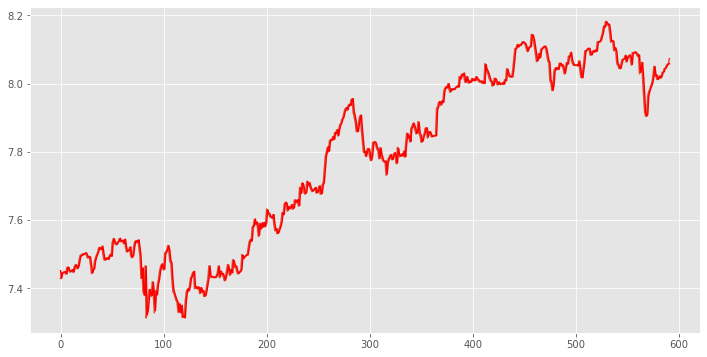

In [82]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

plt.plot(test)
plt.plot(predictions, color='red')

In [83]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2019-11-22,7.427977,7.450665
2019-11-25,7.443400,7.429126
2019-11-26,7.444599,7.444187
2019-11-27,7.447576,7.445288
2019-11-28,7.446264,7.447903
...,...,...
2022-04-04,8.044835,8.044260
2022-04-05,8.051851,8.045596
2022-04-06,8.056760,8.052698


In [84]:
from numpy import array
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [85]:
y_b = np.log(df["Close Price"])
y_b = y_b.asfreq("B").dropna()/10.0
print("%s" % y_b[:10])

Date
2014-04-10    0.629397
2014-04-11    0.629517
2014-04-15    0.628189
2014-04-16    0.628143
2014-04-17    0.629821
2014-04-21    0.629092
2014-04-22    0.628479
2014-04-23    0.627212
2014-04-25    0.624417
2014-04-28    0.621661
Name: Close Price, dtype: float64


In [86]:
n_input = 5
train_size = int(0.7 * len(y_b))
y_b_train = y_b[:train_size]
y_b_test = y_b[train_size:]
generator_train = TimeseriesGenerator(y_b_train, y_b_train, length=n_input, batch_size=1, )
generator_test = TimeseriesGenerator(y_b_test, y_b_test, length=n_input, batch_size=1)
print('Samples: %d' % len(generator_train))
for i in range(3):
    x, y = generator_train[i]
    print('%s => %s' % (x, y))

Samples: 1374
[[0.62939737 0.62951737 0.62818928 0.62814253 0.62982137]] => [0.62909208]
[[0.62951737 0.62818928 0.62814253 0.62982137 0.62909208]] => [0.62847869]
[[0.62818928 0.62814253 0.62982137 0.62909208 0.62847869]] => [0.6272122]


In [87]:
tf.random.set_seed(1)
np.random.seed(1)


model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (n_input,)),
    keras.layers.Dense(1, activation = None, kernel_initializer = keras.initializers.he_uniform(seed = 1.0))
])
model.compile(loss = "mse", optimizer = tf.keras.optimizers.SGD(lr = 0.1))
model.summary()

model.fit_generator(generator_train, steps_per_epoch=1, epochs=500, verbose=0)
y_b_test_pred = model.predict_generator(generator_test, use_multiprocessing = True)
layer = model.layers[0]
print(layer.get_weights())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


C:\Users\ADI\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
C:\Users\ADI\AppData\Local\Temp/ipykernel_18976/3125888695.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator_train, steps_per_epoch=1, epochs=500, verbose=0)
C:\Users\ADI\AppData\Local\Temp/ipykernel_18976/3125888695.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_b_test_pred = model.predict_generator(generator_test, use_multiprocessing = True)


[array([[-0.372954  ],
       [-0.45312348],
       [-0.34003082],
       [ 0.100074  ],
       [ 0.9369794 ]], dtype=float32), array([0.7399956], dtype=float32)]


In [88]:
y_b_test_pred.shape, y_b_test.shape

((587, 1), (592,))

In [89]:
metrics.mean_squared_error(y_b_test[n_input:] * 10.0, y_b_test_pred * 10.0) ** 0.5

1.4069659418152463

In [90]:
y_b = y_b.values
y_b = y_b.reshape((len(y_b), 1))

train_size = int(0.7 * len(y_b))
y_b_train = y_b[:train_size]
y_b_test = y_b[train_size:]

n_input = 5

generator_train = TimeseriesGenerator(y_b_train, y_b_train, length=n_input, batch_size=1, )
generator_test = TimeseriesGenerator(y_b_test, y_b_test, length=n_input, batch_size=1)
print('Samples: %d' % len(generator_train))
for i in range(3):
    x, y = generator_train[i]
    print('%s => %s' % (x, y))

Samples: 1374
[[[0.62939737]
  [0.62951737]
  [0.62818928]
  [0.62814253]
  [0.62982137]]] => [[0.62909208]]
[[[0.62951737]
  [0.62818928]
  [0.62814253]
  [0.62982137]
  [0.62909208]]] => [[0.62847869]]
[[[0.62818928]
  [0.62814253]
  [0.62982137]
  [0.62909208]
  [0.62847869]]] => [[0.6272122]]


In [91]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (n_input,1)),
    keras.layers.LSTM(units = 100),
    keras.layers.Dense(units = 1, activation = None)
])
model.compile(loss = "mse", optimizer = "adam")
model.summary()

model.fit_generator(generator_train, steps_per_epoch=1, epochs=500, verbose=1)
y_b_test_pred = model.predict_generator(generator_test)
layer = model.layers[0]
#print(layer.get_weights())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


C:\Users\ADI\AppData\Local\Temp/ipykernel_18976/4219360948.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator_train, steps_per_epoch=1, epochs=500, verbose=1)


1/1 [==============================] - 1s 1s/step - loss: 0.3158
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3027
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3008
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 0.2371
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 0.1995
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 0.1551
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 0.1345
Epoch 8/500
1/1 [==============================] - 0s 20ms/step - loss: 0.1020
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0554
Epoch 10/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0441
Epoch 11/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0205
Epoch 12/500
1/1 [==============================] - 0s 18ms/step - loss: 0.0072
Epoch 13/500
1/1 [==============================] - 0s 20ms/ste

1/1 [==============================] - 0s 17ms/step - loss: 8.9494e-08
Epoch 101/500
1/1 [==============================] - 0s 15ms/step - loss: 3.4220e-05
Epoch 102/500
1/1 [==============================] - 0s 14ms/step - loss: 6.9574e-07
Epoch 103/500
1/1 [==============================] - 0s 14ms/step - loss: 4.8979e-05
Epoch 104/500
1/1 [==============================] - 0s 15ms/step - loss: 5.0823e-05
Epoch 105/500
1/1 [==============================] - 0s 14ms/step - loss: 2.4896e-04
Epoch 106/500
1/1 [==============================] - 0s 20ms/step - loss: 5.4592e-08
Epoch 107/500
1/1 [==============================] - 0s 15ms/step - loss: 4.9297e-05
Epoch 108/500
1/1 [==============================] - 0s 14ms/step - loss: 3.8548e-06
Epoch 109/500
1/1 [==============================] - 0s 15ms/step - loss: 1.7163e-05
Epoch 110/500
1/1 [==============================] - 0s 15ms/step - loss: 1.3822e-05
Epoch 111/500
1/1 [==============================] - 0s 14ms/step - loss: 3.090

1/1 [==============================] - 0s 22ms/step - loss: 6.4749e-06
Epoch 197/500
1/1 [==============================] - 0s 15ms/step - loss: 1.5513e-06
Epoch 198/500
1/1 [==============================] - 0s 25ms/step - loss: 8.8114e-05
Epoch 199/500
1/1 [==============================] - 0s 19ms/step - loss: 6.7300e-05
Epoch 200/500
1/1 [==============================] - 0s 15ms/step - loss: 7.3075e-05
Epoch 201/500
1/1 [==============================] - 0s 16ms/step - loss: 2.5509e-06
Epoch 202/500
1/1 [==============================] - 0s 16ms/step - loss: 5.0929e-06
Epoch 203/500
1/1 [==============================] - 0s 14ms/step - loss: 1.2728e-05
Epoch 204/500
1/1 [==============================] - 0s 15ms/step - loss: 1.9231e-04
Epoch 205/500
1/1 [==============================] - 0s 25ms/step - loss: 8.3685e-05
Epoch 206/500
1/1 [==============================] - 0s 14ms/step - loss: 3.5408e-04
Epoch 207/500
1/1 [==============================] - 0s 15ms/step - loss: 5.945

1/1 [==============================] - 0s 17ms/step - loss: 6.1250e-05
Epoch 293/500
1/1 [==============================] - 0s 16ms/step - loss: 3.3408e-05
Epoch 294/500
1/1 [==============================] - 0s 15ms/step - loss: 1.2294e-06
Epoch 295/500
1/1 [==============================] - 0s 16ms/step - loss: 1.4036e-04
Epoch 296/500
1/1 [==============================] - 0s 17ms/step - loss: 2.2507e-05
Epoch 297/500
1/1 [==============================] - 0s 15ms/step - loss: 3.6666e-07
Epoch 298/500
1/1 [==============================] - 0s 16ms/step - loss: 9.6047e-05
Epoch 299/500
1/1 [==============================] - 0s 15ms/step - loss: 3.5604e-06
Epoch 300/500
1/1 [==============================] - 0s 14ms/step - loss: 9.5733e-08
Epoch 301/500
1/1 [==============================] - 0s 15ms/step - loss: 1.6403e-06
Epoch 302/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0106e-04
Epoch 303/500
1/1 [==============================] - 0s 16ms/step - loss: 5.908

1/1 [==============================] - 0s 16ms/step - loss: 4.2100e-05
Epoch 389/500
1/1 [==============================] - 0s 15ms/step - loss: 7.0675e-06
Epoch 390/500
1/1 [==============================] - 0s 16ms/step - loss: 1.6081e-05
Epoch 391/500
1/1 [==============================] - 0s 14ms/step - loss: 3.7386e-05
Epoch 392/500
1/1 [==============================] - 0s 15ms/step - loss: 1.2271e-07
Epoch 393/500
1/1 [==============================] - 0s 15ms/step - loss: 3.0486e-05
Epoch 394/500
1/1 [==============================] - 0s 15ms/step - loss: 2.7528e-04
Epoch 395/500
1/1 [==============================] - 0s 15ms/step - loss: 1.9762e-04
Epoch 396/500
1/1 [==============================] - 0s 20ms/step - loss: 6.9021e-06
Epoch 397/500
1/1 [==============================] - 0s 18ms/step - loss: 8.9141e-06
Epoch 398/500
1/1 [==============================] - 0s 19ms/step - loss: 6.9885e-05
Epoch 399/500
1/1 [==============================] - 0s 18ms/step - loss: 2.115

1/1 [==============================] - 0s 19ms/step - loss: 1.3911e-05
Epoch 485/500
1/1 [==============================] - 0s 19ms/step - loss: 1.3037e-04
Epoch 486/500
1/1 [==============================] - 0s 19ms/step - loss: 8.1214e-05
Epoch 487/500
1/1 [==============================] - 0s 16ms/step - loss: 1.8788e-05
Epoch 488/500
1/1 [==============================] - 0s 15ms/step - loss: 1.2299e-05
Epoch 489/500
1/1 [==============================] - 0s 15ms/step - loss: 1.0864e-04
Epoch 490/500
1/1 [==============================] - 0s 17ms/step - loss: 1.4396e-08
Epoch 491/500
1/1 [==============================] - 0s 15ms/step - loss: 4.0922e-05
Epoch 492/500
1/1 [==============================] - 0s 17ms/step - loss: 7.6225e-08
Epoch 493/500
1/1 [==============================] - 0s 15ms/step - loss: 1.3570e-05
Epoch 494/500
1/1 [==============================] - 0s 16ms/step - loss: 3.9039e-05
Epoch 495/500
1/1 [==============================] - 0s 18ms/step - loss: 6.126

C:\Users\ADI\AppData\Local\Temp/ipykernel_18976/4219360948.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_b_test_pred = model.predict_generator(generator_test)


In [92]:
y_b_test_pred.shape, y_b_test.shape

((587, 1), (592, 1))

In [93]:
metrics.mean_squared_error(y_b_test[n_input:] * 10.0, y_b_test_pred * 10.0) ** 0.5


0.15309003499784749

In [95]:
metrics.r2_score(y_b_test[n_input:] * 10.0, y_b_test_pred * 10.0) ** 0.5

0.8034791972553129

In [96]:
metrics.mean_absolute_percentage_error(y_b_test[n_input:] * 10.0, y_b_test_pred * 10.0) ** 0.5

0.13520209196098146

In [97]:
metrics.mean_absolute_error(y_b_test[n_input:] * 10.0, y_b_test_pred * 10.0) ** 0.5

0.378936121206565